# The North Star Metric is the single metric that best captures the core value that your product delivers to customers.

In [2]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from datetime import datetime, time
import pycountry
# from __future__ import division

# import plotly.plotly as py
# import plotly.offline as pyoff
# import plotly.graph_objs as go




In [3]:
data = pd.read_csv("OnlineRetail.csv", encoding= 'unicode_escape')

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
len(data)

541909

# The curicial information neeed includes:
    CustomerId
    UnitPrice
    Quantity
    InvoiceDate

# Therefore our NorthStarMetric (Revennue) = ActiveCustomerCount * AverageUnitPrice * OrderCount

In [7]:
#Monthly Revenue Calculation
#Convert the invoice column to datetime
data['InvoiceDate']  = pd.to_datetime(data['InvoiceDate'])
#data['InvoiceDate']  = data['InvoiceDate'].map(lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M'))

#creating YearMonth field for the ease of reporting and visualization
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

# calculate the revenue for each row
data['Revenue'] = data['Quantity'] * data['UnitPrice']

df_revenue = data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue


,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


# Visualize Monthly based Revenue

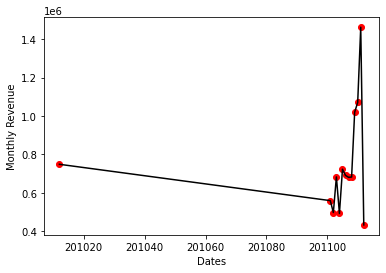

In [8]:
plt.scatter(df_revenue['InvoiceYearMonth'], df_revenue['Revenue'], color='red')
plt.plot(df_revenue['InvoiceYearMonth'], df_revenue['Revenue'], color='black')
plt.xlabel('Dates')
plt.ylabel('Monthly Revenue')
plt.show()

In [9]:
sample = data
sample['Month'] = sample['InvoiceDate'].map(lambda x: x.month)
sample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,12


In [10]:
sample_rev =  sample.groupby('Month')['Revenue'].sum().reset_index()
sample_rev

,Month,Revenue
0,1,560000.260
1,2,498062.650
2,3,683267.080
3,4,493207.121
4,5,723333.510
5,6,691123.120
6,7,681300.111
7,8,682680.510
8,9,1019687.622
9,10,1070704.670


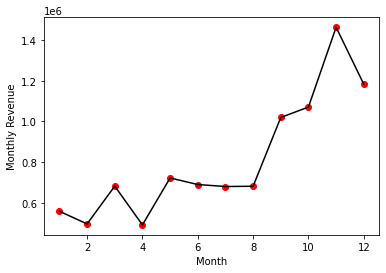

In [11]:
plt.scatter(sample_rev['Month'], sample_rev['Revenue'], color='red')
plt.plot(sample_rev['Month'], sample_rev['Revenue'], color='black')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.show()

# Monthly Revenue Growth Rate

This will be determined using pct_change function in pandas

The pct change function calculates the precentage change betwwen the current and the previous element

In [12]:
#using pct_change() function to see monthly percentage change
df_revenue['MonthlyGrowth'] = df_revenue['Revenue'].pct_change()
df_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


In [13]:
df_revenue1 = df_revenue.dropna()

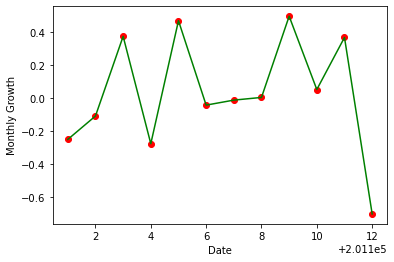

In [14]:
plt.scatter(df_revenue1['InvoiceYearMonth'], df_revenue1['MonthlyGrowth'], color='red')
plt.plot(df_revenue1['InvoiceYearMonth'], df_revenue1['MonthlyGrowth'], color='green')
plt.xlabel('Date')
plt.ylabel('Monthly Growth')
plt.show()

Everything looks good, we saw 36.5% growth previous month (December is excluded in the code since it hasn’t been completed yet). But we need to identify what exactly happened on April. Was it due to less active customers or our customers did less orders? Maybe they just started to buy cheaper products? We can’t say anything without doing a deep-dive analysis.

In [72]:
x_sample = data.groupby(['Country'])['Revenue'].sum().reset_index()
x_sample.drop(x_sample.loc[x_sample['Country']=='Unspecified'].index, inplace=True)



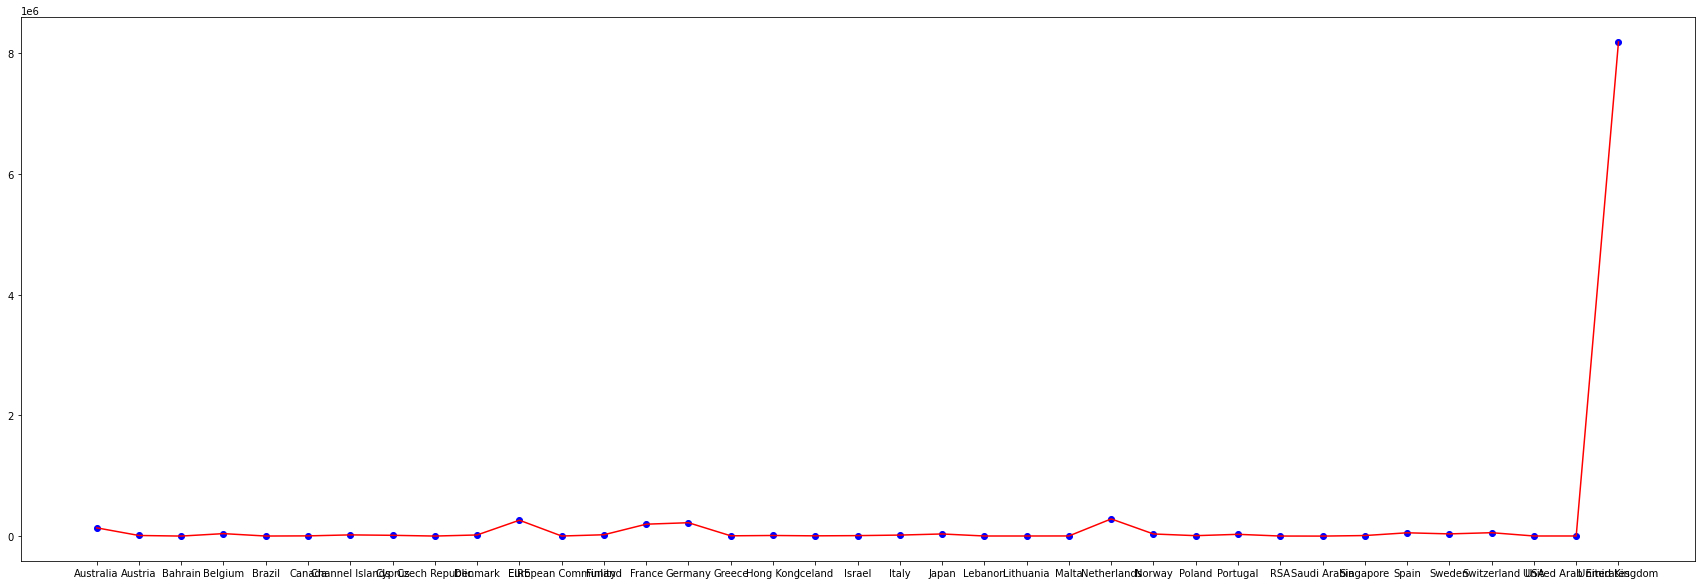

In [73]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

plt.scatter(x_sample['Country'], x_sample['Revenue'], color='blue')
plt.plot(x_sample['Country'], x_sample['Revenue'], color='red')
plt.show()

In [74]:
x_sample

,Country,Revenue
0,Australia,1.370773e+05
1,Austria,1.015432e+04
2,Bahrain,5.484000e+02
3,Belgium,4.091096e+04
4,Brazil,1.143600e+03
5,Canada,3.666380e+03
6,Channel Islands,2.008629e+04
7,Cyprus,1.294629e+04
8,Czech Republic,7.077200e+02
9,Denmark,1.876814e+04


In [109]:
#Crete a Coountry code column for easier visualizations
x_sample['CountryCode'] = x_sample['Country'].map(lambda x: pycountry.countries.get(name= x).alpha_3)



In [147]:
x_sample['Country'] = x_sample['Country'].map(lambda x: 'United Kingdom' if x == 'Channel Islands' else x)
x_sample['Country'] = x_sample['Country'].map(lambda x: 'Czechia' if x == 'Czech Republic' else x)

In [148]:
x_sample['Country'] = x_sample['Country'].map(lambda x: 'Czechia' if x == 'Czech Republic' else x)
x_sample['Country'] = x_sample['Country'].map(lambda x: 'South Africa' if x == 'EIRE' else x)
x_sample['Country'] = x_sample['Country'].map(lambda x: 'United States' if x == 'USA' else x)
x_sample['Country'] = x_sample['Country'].map(lambda x: 'South Africa' if x == 'RSA' else x)
x_sample['Country'] = x_sample['Country'].map(lambda x: 'United Kingdom' if x == 'European Community' else x)
x_sample['Country'] = x_sample['Country'].map(lambda x: 'United States' if x == 'Unites States' else x)
x_sample['Country'] = x_sample['Country'].map(lambda x: 'United Kingdom' if x == 'Channel Islands' else x)

#Drop row with the unspecified country
x_sample.drop(x_sample.loc[x_sample['Country']=='Unspecified'].index, inplace=True)

for i in x_sample['Country']:
    print(pycountry.countries.get(name= i).alpha_3, i)

AUS Australia
AUT Austria
BHR Bahrain
BEL Belgium
BRA Brazil
CAN Canada
GBR United Kingdom
CYP Cyprus
CZE Czechia
DNK Denmark
ZAF South Africa
GBR United Kingdom
FIN Finland
FRA France
DEU Germany
GRC Greece
HKG Hong Kong
ISL Iceland
ISR Israel
ITA Italy
JPN Japan
LBN Lebanon
LTU Lithuania
MLT Malta
NLD Netherlands
NOR Norway
POL Poland
PRT Portugal
ZAF South Africa
SAU Saudi Arabia
SGP Singapore
ESP Spain
SWE Sweden
CHE Switzerland
USA United States
ARE United Arab Emirates
GBR United Kingdom


In [160]:
#Crete a Coountry code column for easier visualizations
x_sample['CountryCode'] = x_sample['Country'].map(lambda x: pycountry.countries.get(name= x).alpha_3)
x_sample = x_sample.groupby(['CountryCode'])['Revenue'].sum().reset_index()
x_sample

KeyError: 'Country'

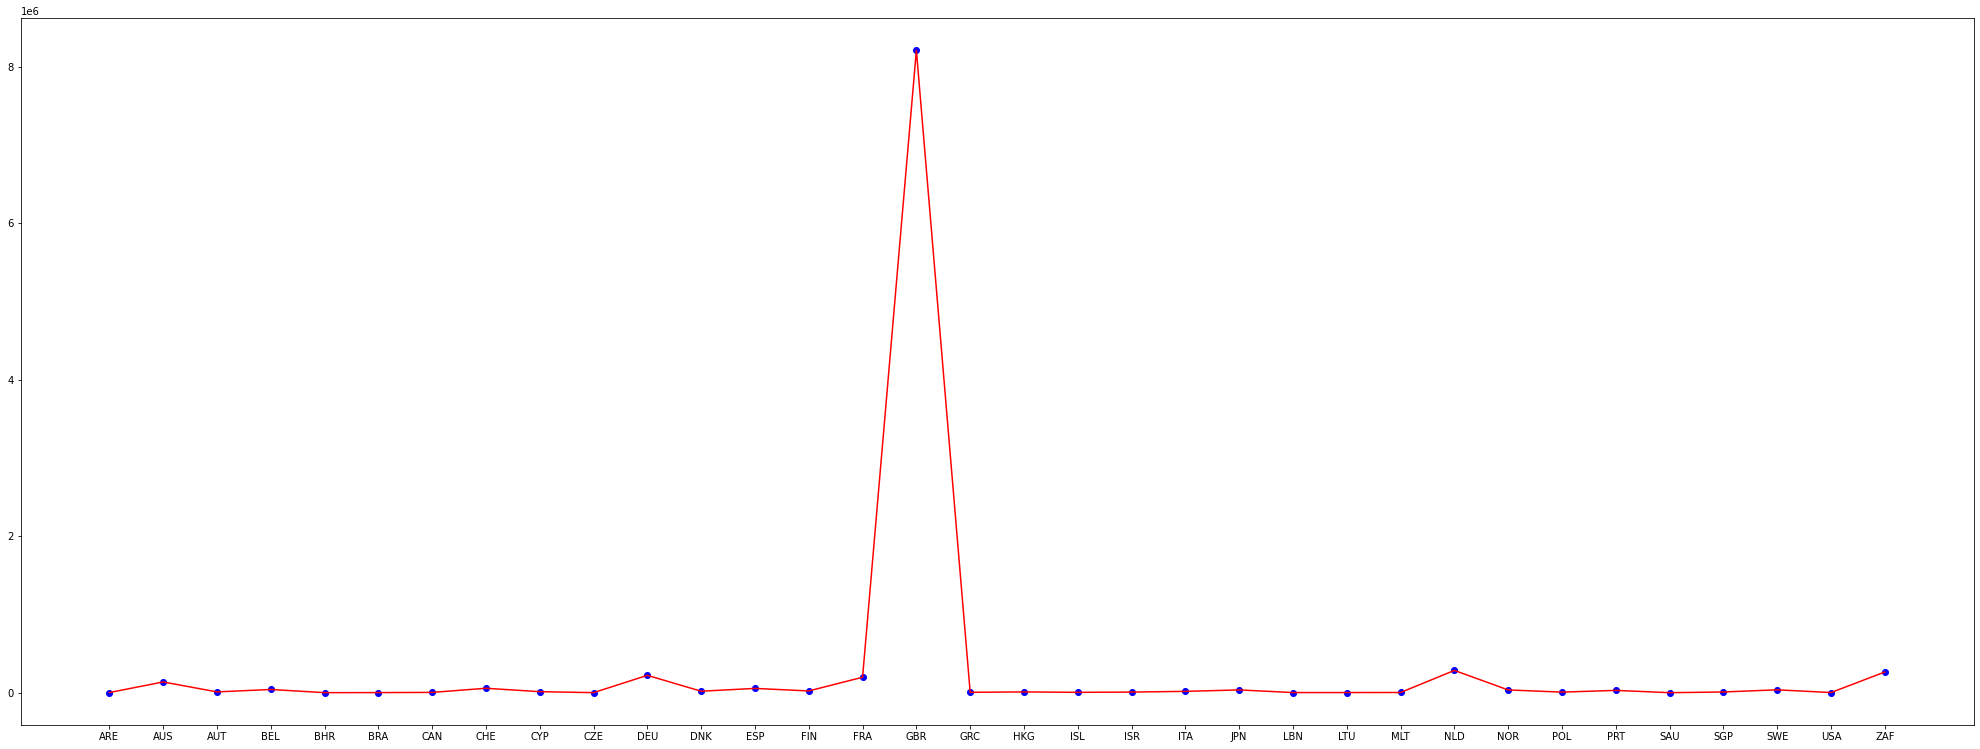

In [161]:
#Plotting using the Country Code
f = plt.figure()
f.set_figwidth(35)
f.set_figheight(13)

plt.scatter(x_sample['CountryCode'], x_sample['Revenue'], color='blue')
plt.plot(x_sample['CountryCode'], x_sample['Revenue'], color='red')
plt.show()

In [162]:
x_sample

,CountryCode,Revenue
0,ARE,1.902280e+03
1,AUS,1.370773e+05
2,AUT,1.015432e+04
3,BEL,4.091096e+04
4,BHR,5.484000e+02
5,BRA,1.143600e+03
6,CAN,3.666380e+03
7,CHE,5.638535e+04
8,CYP,1.294629e+04
9,CZE,7.077200e+02


In [163]:
pycountry.countries.get(name= 'United Kingdom').alpha_3

'GBR'

# Monthly Active Customers

Using the UK data to track Monthly active customers

In [173]:
# create a new dataframe containing UK data only
uk_df = data[data['Country'] == 'United Kingdom']

#creating monthly active customers dataframe by counting unique Customer IDs
monthly_active_uk = uk_df.groupby('Month')['CustomerID'].nunique().reset_index()
monthly_active_uk.head()

,Month,CustomerID
0,1,684
1,2,714
2,3,923
3,4,817
4,5,985


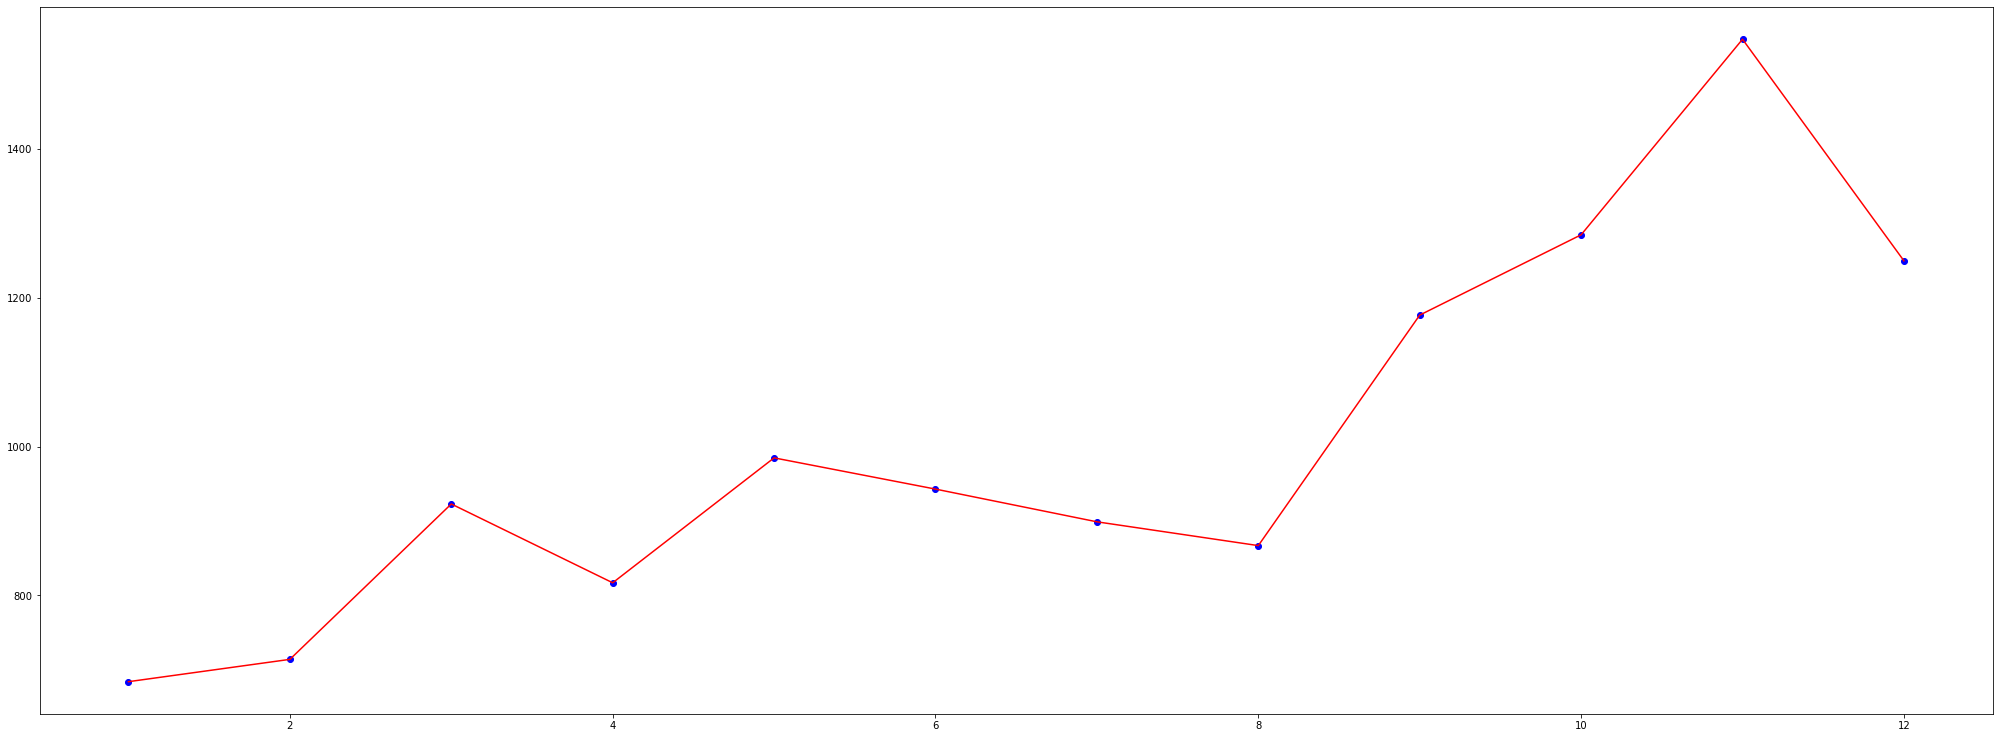

In [182]:
#Plotting the Number of monthly active customers
f = plt.figure()
f.set_figwidth(35)
f.set_figheight(13)

plt.scatter(monthly_active_uk['Month'], monthly_active_uk['CustomerID'], color='blue')
plt.plot(monthly_active_uk['Month'], monthly_active_uk['CustomerID'], color='red')
plt.show()

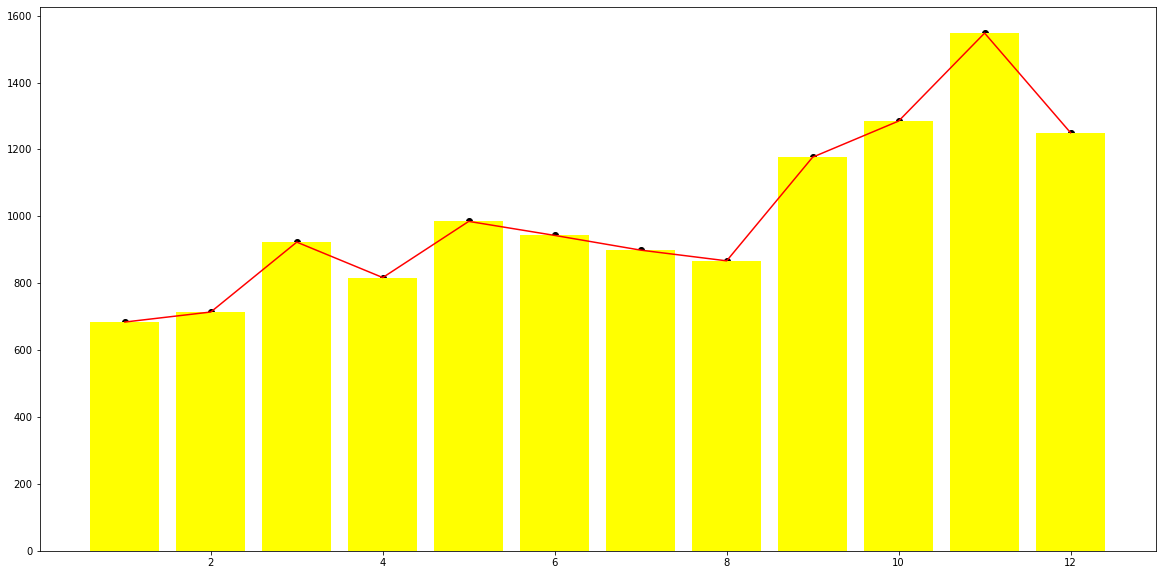

In [214]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.bar(monthly_active_uk['Month'], monthly_active_uk['CustomerID'], color='yellow')
plt.plot(monthly_active_uk['Month'], monthly_active_uk['CustomerID'], color='red')
plt.scatter(monthly_active_uk['Month'], monthly_active_uk['CustomerID'], color='black')
plt.show()